In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
pip install scikit-optimize

In [ ]:

pip install category_encoders

In [ ]:
df = pd.read_csv("/content/dataset 2.csv")

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.duplicated().sum()

3854

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["gender"] = (df["gender"] == "Male").astype(int)
df["smoking_history"] = (df["smoking_history"]=="current").astype(int)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
df.info()
cols = ["gender","age","hypertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level","diabetes"]

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


In [ ]:
df["diabetes"].unique()
df["gender"].unique()
df["smoking_history"].unique()

array([0, 1])

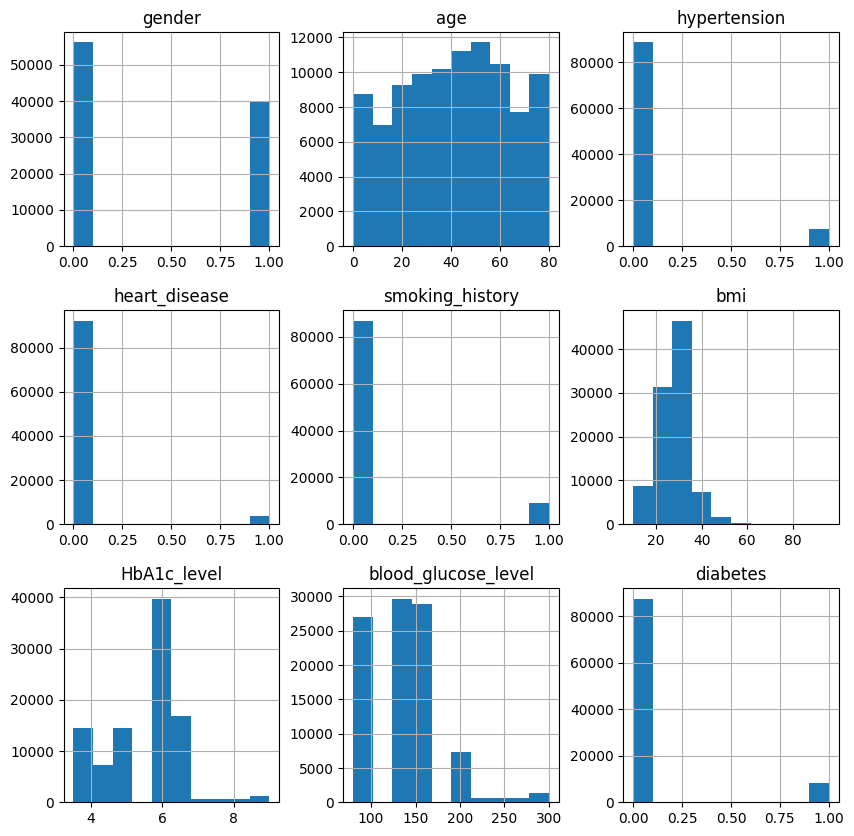

In [ ]:
# Histogram of each feature
df.hist(bins=10, figsize=(10,10))
plt.show()

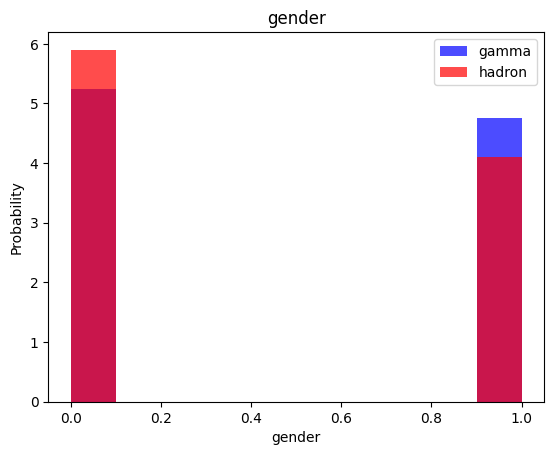

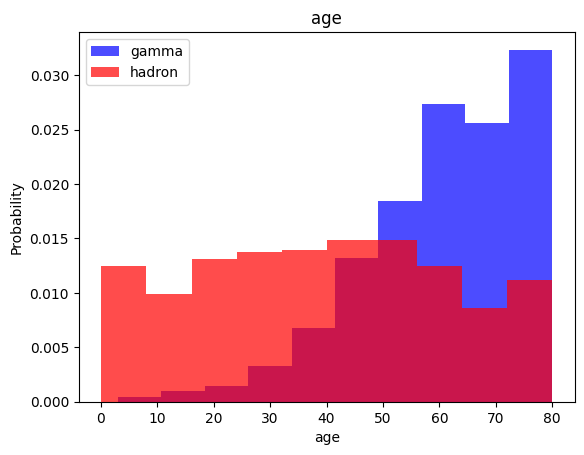

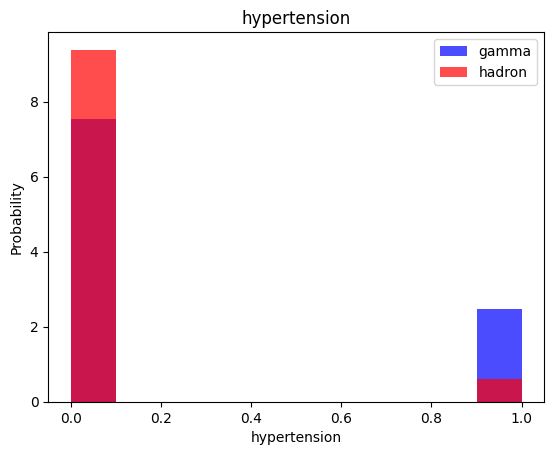

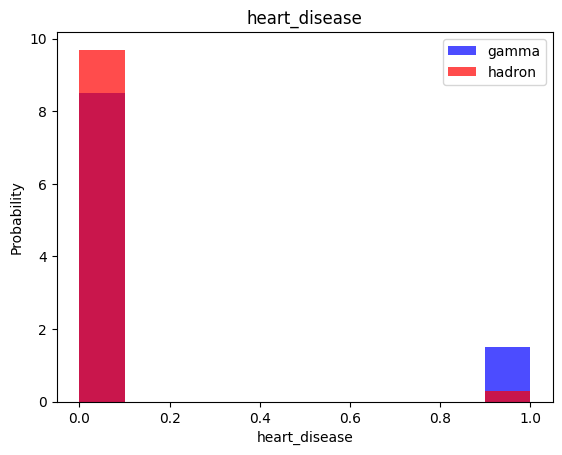

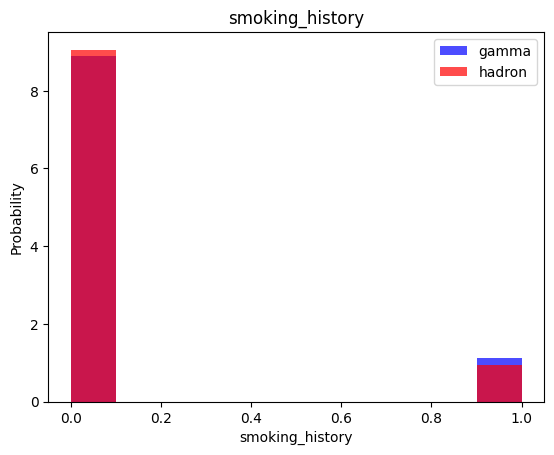

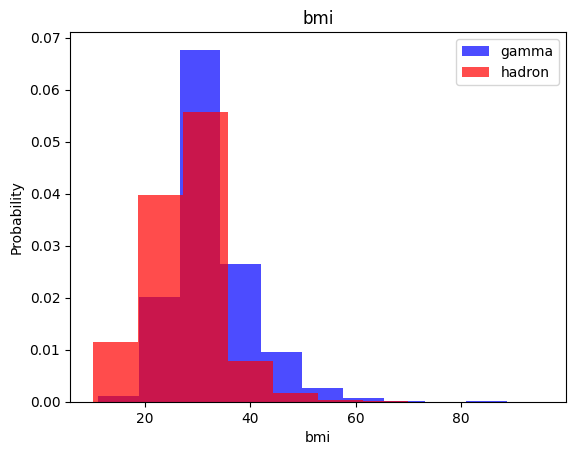

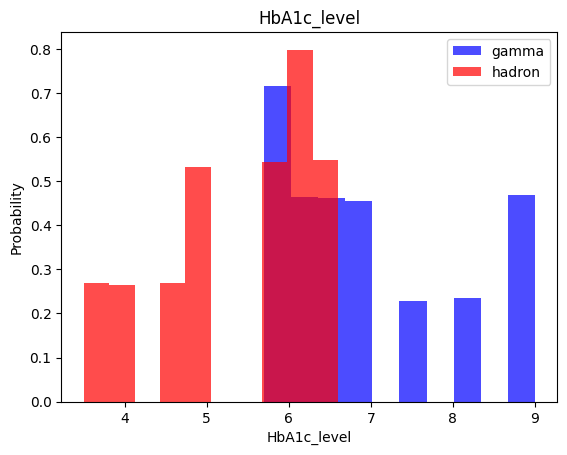

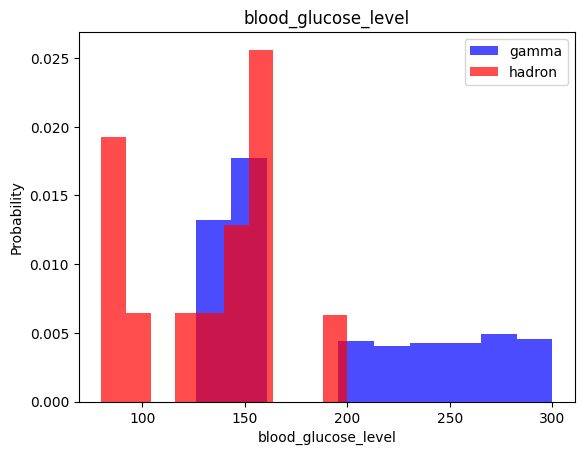

In [ ]:
# Relation between features and target class diabetes
for label in cols[:-1]:
  plt.hist(df[df["diabetes"]==1][label], color='blue',label='gamma',alpha=0.7,density='true')
  plt.hist(df[df["diabetes"]==0][label], color='red',label='hadron',alpha=0.7,density='true')
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Correlation Analysis

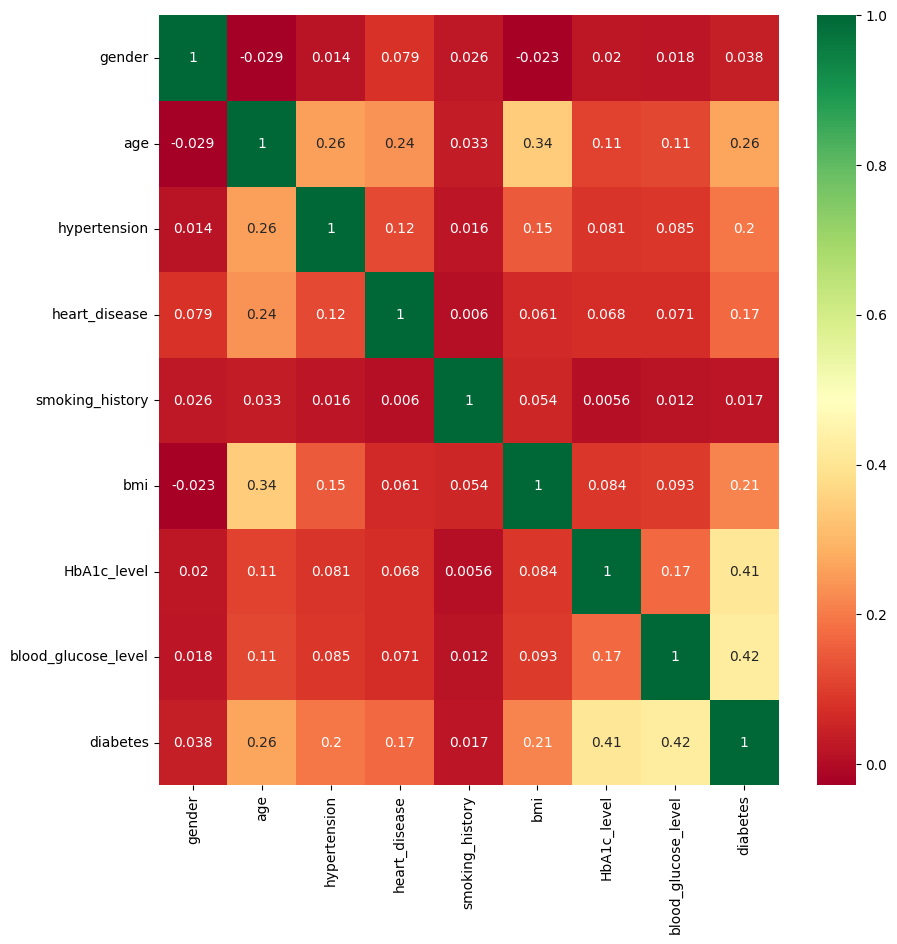

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Train,Validation and Test Datasets


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# Scale dataset if it is too variate
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  # Fit and Transform x
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  #Whole data as huge 2D numpy array : Combining Features and Target
  data = np.hstack((X,np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
#Since for have not seen valid and test oversample is set to false
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


In [ ]:
len(y_train)

105154

In [ ]:
sum(y_train==0)


52577

In [ ]:
sum(y_train==1)


52577

In [ ]:
len(X_train)

105154

#knn

In [ ]:
#knn - basically predicting new value according to majority whats around you
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print("KNN Classification_Report on kaggle dataset")
print(classification_report(y_test, y_pred))

KNN Classification_Report on kaggle dataset
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     17598
           1       0.58      0.76      0.66      1632

    accuracy                           0.93     19230
   macro avg       0.78      0.86      0.81     19230
weighted avg       0.94      0.93      0.94     19230



In [ ]:
from sklearn import metrics
Accuracy_knn2 = metrics.accuracy_score(y_test,y_pred)
print("Accuracy of KNN Model2: ",Accuracy_knn2*100)

Accuracy of KNN Model2:  93.35413416536662


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
result1 = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result1)

Confusion Matrix:
[[16707   891]
 [  387  1245]]


<Axes: >

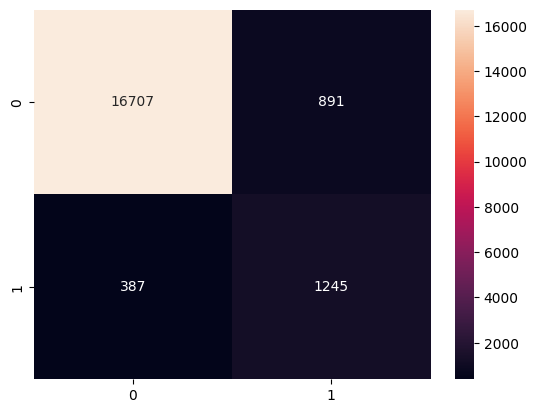

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm=confusion_matrix(y_test,y_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Classification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 16707
FP - False Positive 891
FN - False Negative 387
TP - True Positive 1245
Accuracy Rate: 93.35413416536662
Classification Rate: 6.645865834633385


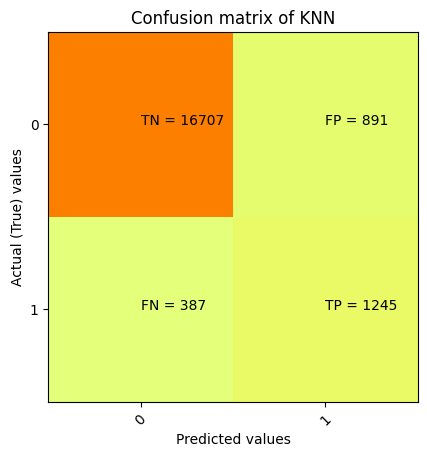

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title("Confusion matrix of KNN")
plt.ylabel("Actual (True) values")
plt.xlabel("Predicted values")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
#Accuracy : how many did get right
#precision: Out of all how many were true values
#recall: Out of true values how many were true values


# AUC

In [ ]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test,y_pred)*100,2)
print('roc_auc_score of KNN:',auc)

roc_auc_score of KNN: 85.61


<function matplotlib.pyplot.show(close=None, block=None)>

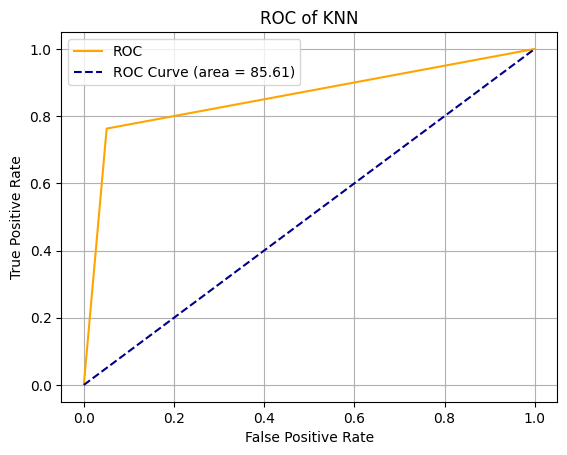

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC Curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of KNN')
plt.legend()
plt.grid()
plt.show

#XGBoost


Pipeline of training


In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf',XGBClassifier(random_state=8))
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

**Hyperparameter tuning**

In [ ]:
# used scikit-optimize for hp tuning
from skopt import BayesSearchCV   #SKlearn search wrapper
from skopt.space import Real, Categorical, Integer


# set up ranges
search_space = {
    #name of xgb classifier estimator__ hyperparameter name
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}
                   #                   number of folds   iterations
opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=8)

train xgboost model


In [ ]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=N...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

Evaluate Model and make predictions

In [ ]:
opt.best_estimator_

Pipeline(steps=[('encoder', TargetEncoder(cols=[])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.9425384185492701,
                               colsample_bynode=0.9095956806239844,
                               colsample_bytree=0.706128679361455, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1.6598135411398998,
                               g...None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.7929828265552742, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=8, ...))])

In [ ]:
opt.best_score_   #evaluate estimator :  the closer to 1 the better the predictions

0.9828502202357144

In [ ]:
opt.score(X_test, y_test)

0.9507723833367874

In [ ]:
y_p = opt.predict(X_test)

In [ ]:
opt.predict_proba(X_test)

array([[4.0887058e-01, 5.9112942e-01],
       [9.9972993e-01, 2.7009469e-04],
       [9.9974340e-01, 2.5657748e-04],
       ...,
       [5.5720341e-01, 4.4279659e-01],
       [9.9893266e-01, 1.0673337e-03],
       [7.9952991e-01, 2.0047012e-01]], dtype=float32)

In [ ]:

print("XGBoost Classification_Report Kaggle dataset")
print(classification_report(y_test,y_p))

XGBoost Classification_Report Kaggle dataset
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     17598
           1       0.55      0.85      0.67      1632

    accuracy                           0.93     19230
   macro avg       0.77      0.89      0.81     19230
weighted avg       0.95      0.93      0.94     19230



In [ ]:
from sklearn import metrics
Accuracy_xgg2 = metrics.accuracy_score(y_test,y_p)
print("Accuracy of XGG Model2: ",Accuracy_xgg2*100)

Accuracy of XGG Model2:  92.90691627665106


Predictive system for xgboost

In [ ]:
input_data = (1,44,0,0,0,19.31,6.5,200)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = knn_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The person is Not diabetic")
else:
  print("The person is Diabetic")

[1]
The person is Diabetic


#SVM



In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_predd = svm_model.predict(X_test)
print("SVM Classification_Report on Kaggle dataset")
print(classification_report(y_test,y_predd))

SVM Classification_Report on Kaggle dataset
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     17598
           1       0.43      0.92      0.59      1632

    accuracy                           0.89     19230
   macro avg       0.71      0.91      0.76     19230
weighted avg       0.94      0.89      0.91     19230



In [ ]:
from sklearn import metrics
Accuracy_svm2 = metrics.accuracy_score(y_test,y_predd)
print("Accuracy of SVM Model2: ",Accuracy_svm2*100)

Accuracy of SVM Model2:  88.89235569422776


Predictive model for svm


In [ ]:
input_data = (1,44,0,0,0,19.31,6.5,200)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = svm_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The person is Not diabetic")
else:
  print("The person is Diabetic")

[0]
The person is Not diabetic


In [ ]:
import pickle


In [ ]:
file = 'trained_model_svm_dataset2.sav'
pickle.dump(svm_model,open(file,'wb'))

In [ ]:
loaded_model_svm = pickle.load(open('trained_model_svm_dataset2.sav','rb'))


In [ ]:
input_data = (6,148,72,35,0,33.6,0.627,50)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = loaded_model_svm.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The person is Not diabetic")
else:
  print("The person is Diabetic")

[0]
The person is Not diabetic


#Comparision Chart


In [ ]:
Accuracy = {'KNN':94 ,'XGBoost':92,'SVM':89}
xlabels = list(Accuracy.keys())
ylabels = list(Accuracy.values())

Text(0.5, 1.0, 'Comparision between Models in Kaggle dataset')

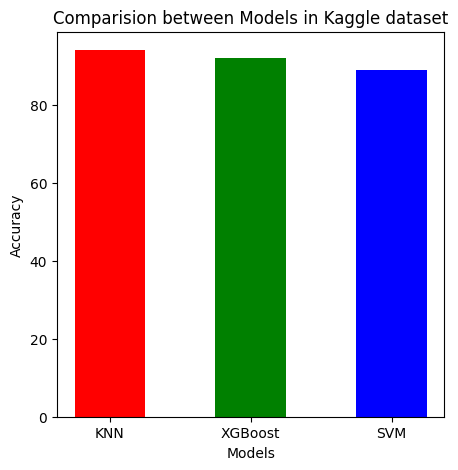

In [ ]:
plt.figure(figsize=(5,5))
color = ['red','green','blue']
plt.bar(xlabels,ylabels,color=color,width=0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparision between Models in Kaggle dataset')